In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EV_Battery_Degradation_100K.csv")
df.head()


,Vehicle_Age_Years,Battery_Capacity_kWh,Daily_Usage_km,Total_Distance_km,Charge_Cycles,Fast_Charge_%,Avg_Temperature_C,Battery_Degradation_%
0,4.81,50,46.6,79788.0,680.0,20.1,18.6,22.39
1,11.43,50,10.7,47503.0,403.0,33.9,34.7,42.66
2,8.92,50,52.0,155424.0,1173.0,14.9,28.6,41.72
3,7.38,50,32.2,83079.0,750.0,21.6,29.4,31.36
4,2.29,50,38.6,35430.0,295.0,21.8,18.5,5.40


### Basic Data Understanding


In [4]:
df.shape

(100000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vehicle_Age_Years      100000 non-null  float64
 1   Battery_Capacity_kWh   100000 non-null  int64  
 2   Daily_Usage_km         100000 non-null  float64
 3   Total_Distance_km      100000 non-null  float64
 4   Charge_Cycles          100000 non-null  float64
 5   Fast_Charge_%          100000 non-null  float64
 6   Avg_Temperature_C      100000 non-null  float64
 7   Battery_Degradation_%  100000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 6.1 MB


In [6]:
df.describe()

,Vehicle_Age_Years,Battery_Capacity_kWh,Daily_Usage_km,Total_Distance_km,Charge_Cycles,Fast_Charge_%,Avg_Temperature_C,Battery_Degradation_%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.244104,52.839250,55.300171,125859.593830,1011.655600,28.554914,27.994899,29.974225
std,3.315925,16.334184,24.210598,91599.926272,741.063011,15.679713,5.970680,13.958690
min,0.500000,30.000000,10.000000,1689.000000,14.000000,5.000000,10.000000,0.000000
25%,3.370000,40.000000,38.100000,50718.500000,406.000000,16.100000,23.900000,18.250000
50%,6.260000,50.000000,55.000000,106707.000000,854.000000,26.500000,28.000000,31.980000
75%,9.120000,60.000000,71.800000,181877.250000,1459.000000,38.900000,32.000000,45.000000
max,12.000000,90.000000,160.500000,624533.000000,5481.000000,70.000000,45.000000,45.000000


In [7]:
df.dtypes

Vehicle_Age_Years        float64
Battery_Capacity_kWh       int64
Daily_Usage_km           float64
Total_Distance_km        float64
Charge_Cycles            float64
Fast_Charge_%            float64
Avg_Temperature_C        float64
Battery_Degradation_%    float64
dtype: object

In [4]:
df.isnull().sum()


Vehicle_Age_Years        0
Battery_Capacity_kWh     0
Daily_Usage_km           0
Total_Distance_km        0
Charge_Cycles            0
Fast_Charge_%            0
Avg_Temperature_C        0
Battery_Degradation_%    0
dtype: int64

### EDA

##### Target Variable Distribution

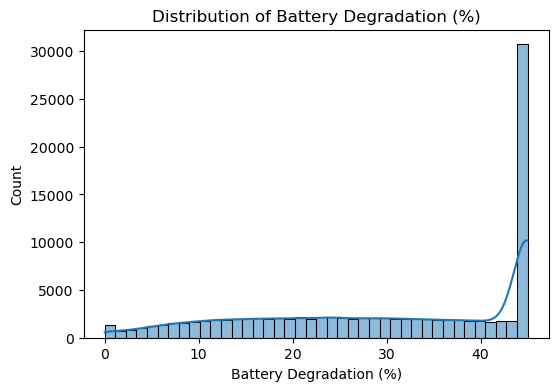

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df['Battery_Degradation_%'], kde=True)
plt.title("Distribution of Battery Degradation (%)")
plt.xlabel("Battery Degradation (%)")
plt.ylabel("Count")
plt.show()

##### Battery Degradation vs Vehicle Age

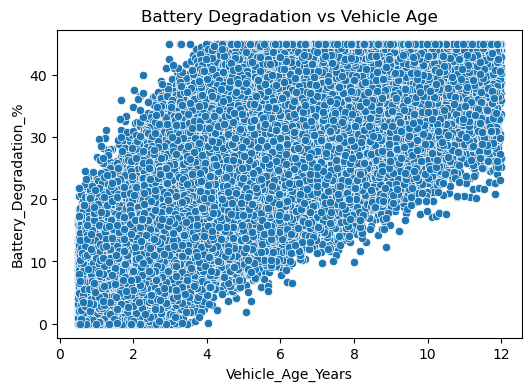

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Vehicle_Age_Years',
    y='Battery_Degradation_%',
    data=df
)
plt.title("Battery Degradation vs Vehicle Age")
plt.show()


#### Battery Degradation vs Charge Cycles

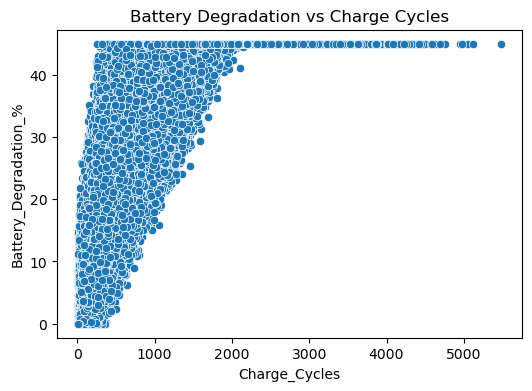

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Charge_Cycles',
    y='Battery_Degradation_%',
    data=df
)
plt.title("Battery Degradation vs Charge Cycles")
plt.show()


#### Battery Degradation vs Fast Charging %

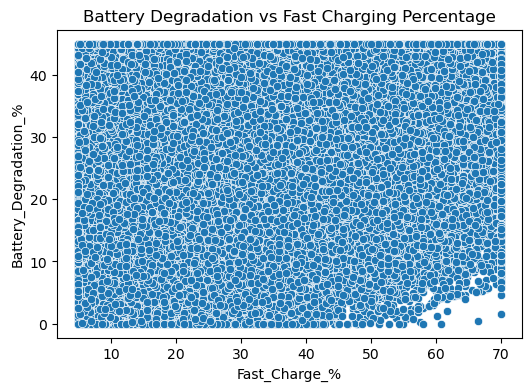

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Fast_Charge_%',
    y='Battery_Degradation_%',
    data=df
)
plt.title("Battery Degradation vs Fast Charging Percentage")
plt.show()


#### Correlation Heatmap

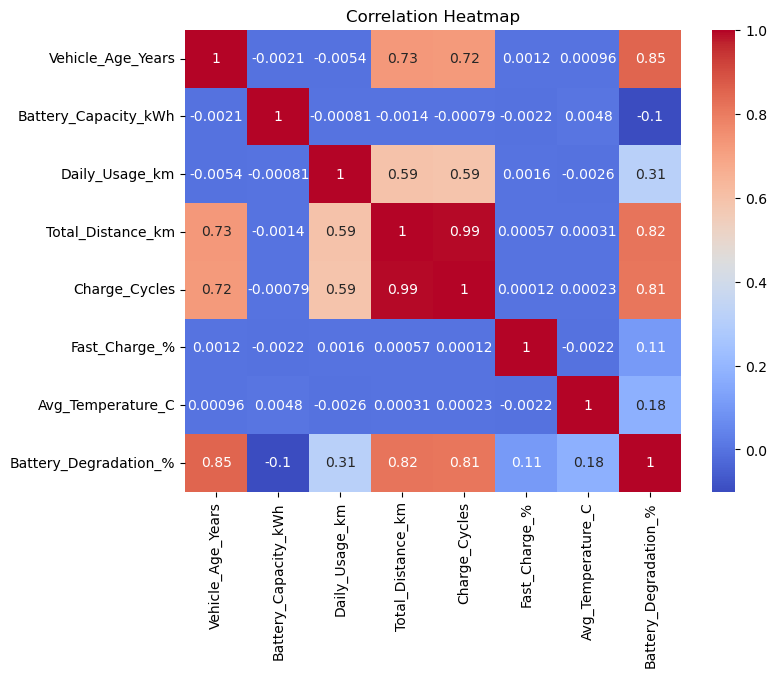

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### OUTLIER HANDLING & FEATURE FINALIZATION

In [14]:
import matplotlib.pyplot as plt

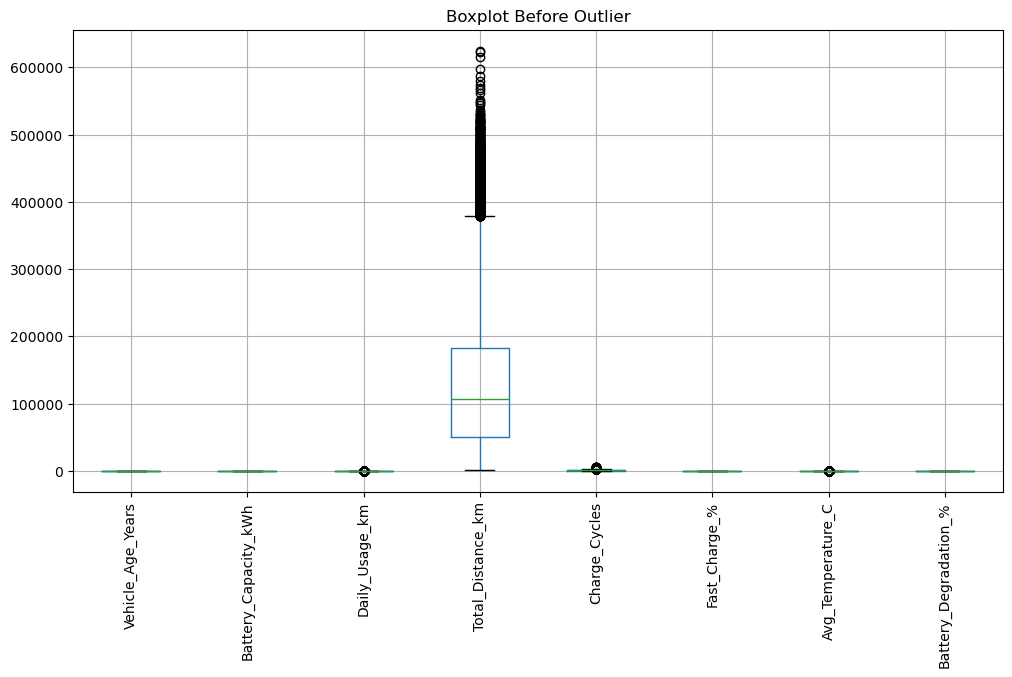

In [32]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier")
plt.show()


In [16]:
import numpy as np

In [17]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

In [18]:
df_out = df.copy()

for col in df_out.columns:
    df_out = treat_outliers_iqr(df_out, col)


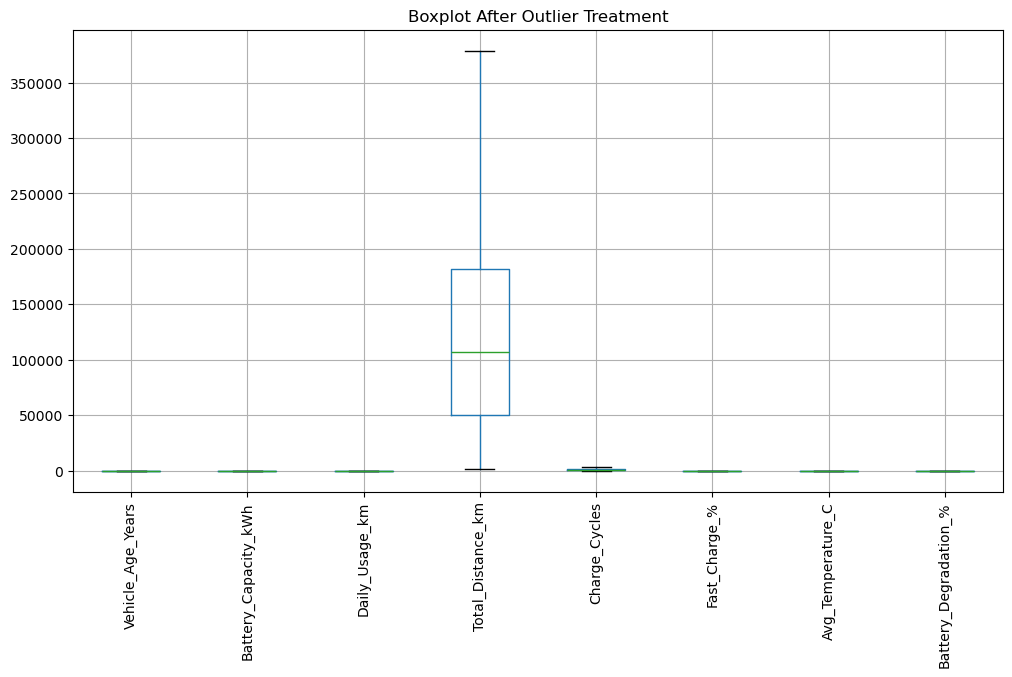

In [33]:
plt.figure(figsize=(12,6))
df_out.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Treatment")
plt.show()

###### Feature & Target Separation

In [20]:
X = df_out.drop('Battery_Degradation_%', axis=1)
y = df_out['Battery_Degradation_%']


### Train-Test Split 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### K-Fold Cross-Validation

In [36]:
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error)
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    cv = cross_validate(
        model,
        X, y,
        cv=kfold,
        scoring=scoring
    )
    
    mean_r2 = np.mean(cv['test_r2'])
    mean_mse = np.mean(cv['test_mse'])
    mean_rmse = np.sqrt(mean_mse)   
    
    results.append({
        'Model': name,
        'Mean R2 Score': mean_r2,
        'Mean MSE': mean_mse,
        'Mean RMSE': mean_rmse
    })

cv_results_df = pd.DataFrame(results)
print(cv_results_df.sort_values(by='Mean R2 Score', ascending=False))

               Model  Mean R2 Score   Mean MSE  Mean RMSE
2      Random Forest       0.985651   2.795664   1.672024
5  Gradient Boosting       0.982230   3.462335   1.860735
1      Decision Tree       0.967880   6.258313   2.501662
4           AdaBoost       0.933190  13.018417   3.608104
0  Linear Regression       0.885272  22.352805   4.727875
3                KNN       0.874135  24.521542   4.951923


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

rf_r2, rf_mae, rf_rmse


(0.9857754162441364, 1.1445682250000002, np.float64(1.668809174240872))

### HYPERPARAMETER TUNING

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [47]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("Best RF Parameters:", rf_grid.best_params_)

Best RF Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


##### Retraining  Random Forest with best parameters

In [49]:

best_rf = RandomForestRegressor(
    max_depth=None,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
best_rf.fit(X_train, y_train)


rf_pred = best_rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Final Random Forest R²:", rf_r2)
print("Final Random Forest MAE:", rf_mae)
print("Final Random Forest RMSE:", rf_rmse)

Final Random Forest R²: 0.9859234949132728
Final Random Forest MAE: 1.1395824350000001
Final Random Forest RMSE: 1.6601002539878762


### Saving  the Model


In [51]:
import joblib
joblib.dump(best_rf, "battery_degradation_rf.pkl")

['battery_degradation_rf.pkl']

### Predictions on New Data

In [55]:
import pandas as pd

new_ev_data = pd.DataFrame({
    'Vehicle_Age_Years': [4.3],
    'Battery_Capacity_kWh': [30],
    'Daily_Usage_km': [60],
    'Total_Distance_km': [82000],
    'Charge_Cycles': [720],
    'Fast_Charge_%': [30],
    'Avg_Temperature_C': [32]
})

In [36]:
loaded_model.predict(new_ev_data)


array([29.3889])